In [2]:
import pandas as pd

# Load CSV data
df = pd.read_csv("hiscores.csv")

# Show the first few rows
print(df.head())

   beatmap_id    score       pp  mods rank                score_time  \
0     4895825  4003396  221.687     0    S  2025-03-08T05:33:04.000Z   
1     4857995  5109062  226.332     0    S  2025-03-20T03:35:38.000Z   
2     4793476  1948334  250.582     0    A  2025-04-11T00:12:17.000Z   
3     4947078  4599010  238.777     0    A  2025-04-12T02:52:16.000Z   
4     4670418  6141520  218.509     0    A  2025-04-17T16:58:18.000Z   

                update_time  
0  2025-07-23T23:46:15.000Z  
1  2025-07-23T23:46:15.000Z  
2  2025-07-23T23:46:15.000Z  
3  2025-07-23T23:46:15.000Z  
4  2025-07-23T23:46:15.000Z  


In [3]:
# convert the 'date' column to datetime format
df['score_time'] = pd.to_datetime(df['score_time'])
df['update_time'] = pd.to_datetime(df['update_time'])
print(df.head())

# create mod list col
df['mod_list'] = df['mods'].astype(str).str.split(',')

   beatmap_id    score       pp  mods rank                score_time  \
0     4895825  4003396  221.687     0    S 2025-03-08 05:33:04+00:00   
1     4857995  5109062  226.332     0    S 2025-03-20 03:35:38+00:00   
2     4793476  1948334  250.582     0    A 2025-04-11 00:12:17+00:00   
3     4947078  4599010  238.777     0    A 2025-04-12 02:52:16+00:00   
4     4670418  6141520  218.509     0    A 2025-04-17 16:58:18+00:00   

                update_time  
0 2025-07-23 23:46:15+00:00  
1 2025-07-23 23:46:15+00:00  
2 2025-07-23 23:46:15+00:00  
3 2025-07-23 23:46:15+00:00  
4 2025-07-23 23:46:15+00:00  


In [4]:
# Summary statistics
print(df.describe())

# Unique beatmaps
print("Unique beatmaps:", df['beatmap_id'].nunique())

# Most common ranks
print("Top ranks:\n", df['rank'].value_counts())

# Most common mods
mod_counts = df['mod_list'].explode().value_counts()
print("Top mods:\n", mod_counts)


         beatmap_id         score          pp        mods
count  1.380000e+02  1.380000e+02  138.000000  138.000000
mean   4.446802e+06  8.157418e+06  242.523855    0.347826
std    1.130790e+06  9.496863e+06   23.562030    2.341788
min    7.140010e+05  3.413580e+05  216.217000    0.000000
25%    4.753522e+06  2.007182e+06  224.661750    0.000000
50%    4.865582e+06  4.599175e+06  235.338000    0.000000
75%    4.962343e+06  1.001106e+07  253.613250    0.000000
max    5.208042e+06  6.017646e+07  321.200000   16.000000
Unique beatmaps: 126
Top ranks:
 rank
A    89
S    48
X     1
Name: count, dtype: int64
Top mods:
 mod_list
0     135
16      3
Name: count, dtype: int64


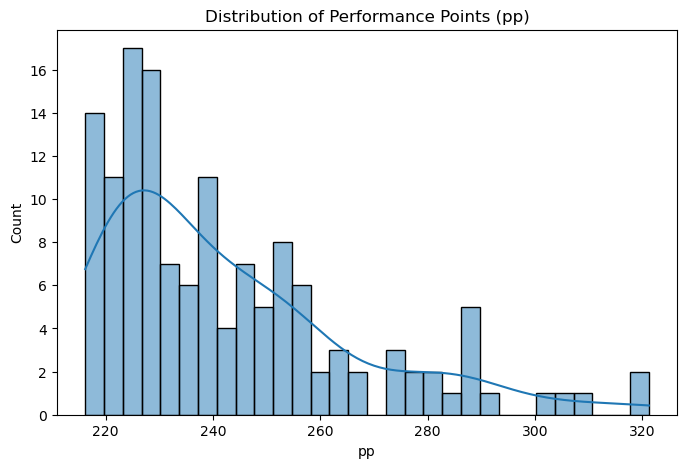

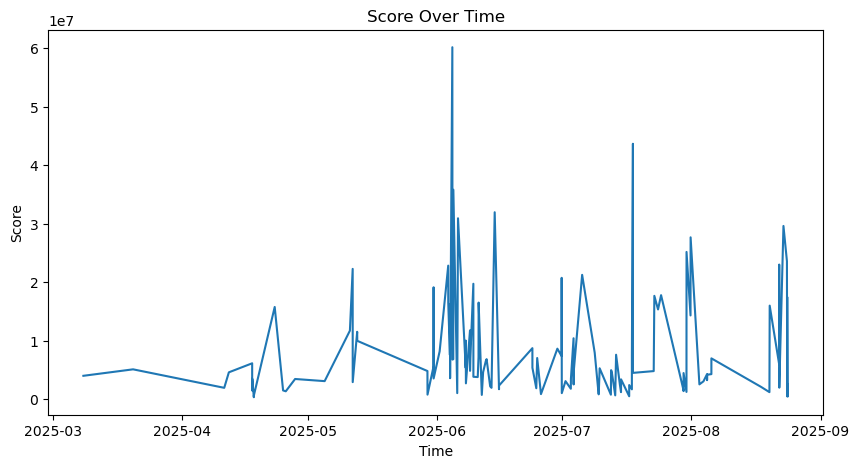

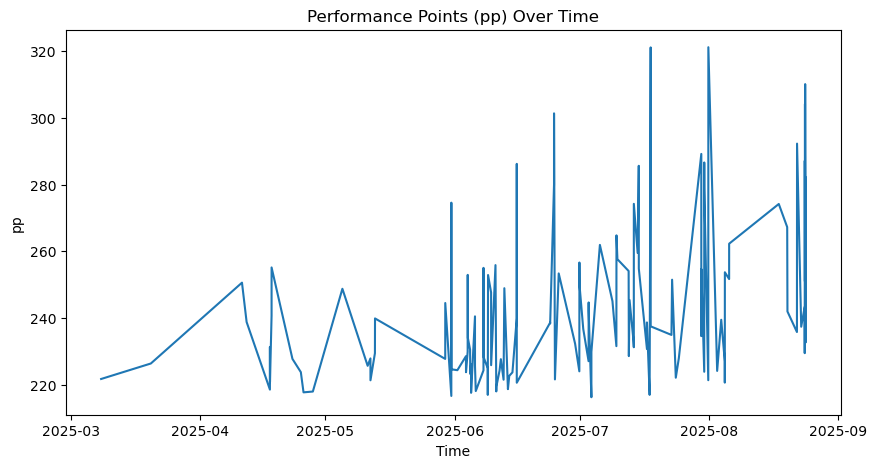

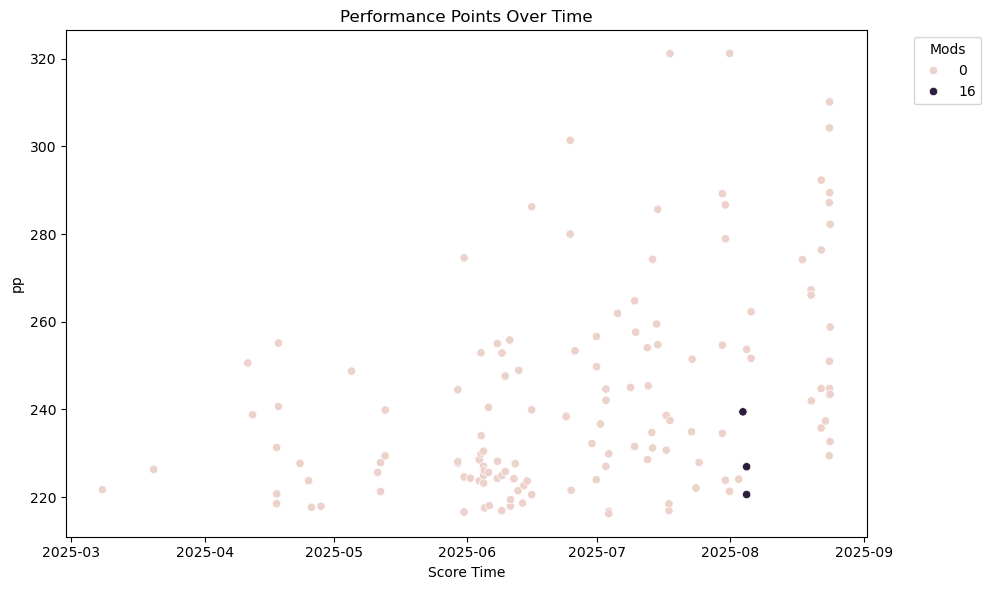

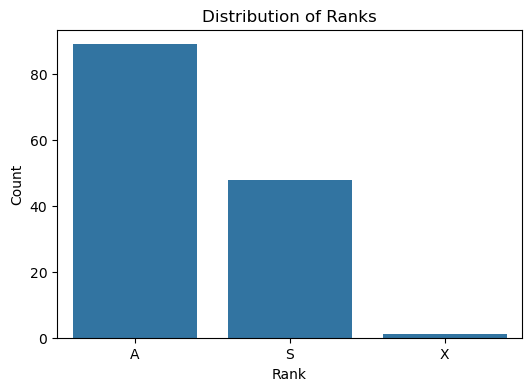

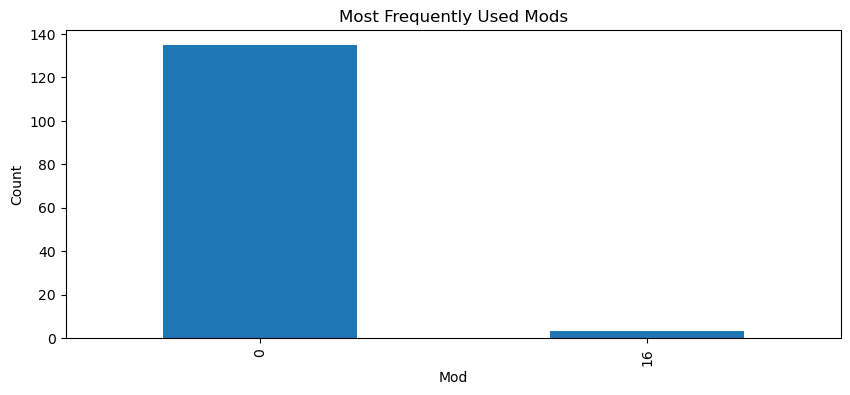

In [5]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of performance points
plt.figure(figsize=(8, 5))
sns.histplot(df['pp'], bins=30, kde=True)
plt.title('Distribution of Performance Points (pp)')
plt.xlabel('pp')
plt.ylabel('Count')
plt.show()

# Score over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.sort_values('score_time'), x='score_time', y='score')
plt.title('Score Over Time')
plt.xlabel('Time')
plt.ylabel('Score')
plt.show()

# PP over time line graph
plt.figure(figsize=(10, 5))
sns.lineplot(data=df.sort_values('score_time'), x='score_time', y='pp')
plt.title('Performance Points (pp) Over Time')
plt.xlabel('Time')
plt.ylabel('pp')
plt.show()

# PP over time scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='score_time', y='pp', hue='mods')
plt.title('Performance Points Over Time')
plt.xlabel('Score Time')
plt.ylabel('pp')
plt.legend(title='Mods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Bar plot of ranks
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='rank', order=df['rank'].value_counts().index)
plt.title('Distribution of Ranks')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.show()

# Bar plot of mods used
plt.figure(figsize=(10, 4))
mod_counts.plot(kind='bar')
plt.title('Most Frequently Used Mods')
plt.xlabel('Mod')
plt.ylabel('Count')
plt.show()
